## EDA: Portuguese Higher and Secondary Education

This notebook explores the shapes, trends, and relationships of the data present in the modelling tables created from the datasets.

### Imports and reading datasets

In [11]:
import os
import sys
sys.path.insert(0, os.path.abspath('../scripts'))
import maps as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #must have

lower_model_df = pd.read_csv("../../data/results/lower_ed_scored.csv")
higher_model_df = pd.read_csv("../../data/results/higher_ed_scored.csv")

### 6. Performance Throughout highered is more influential than social economic factors on dropout likelihood (Approved)

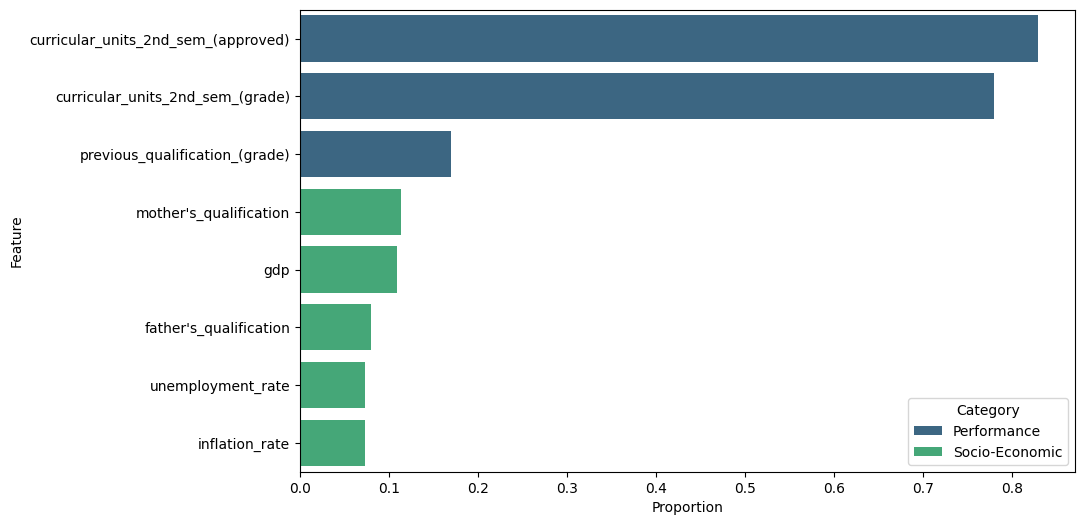

In [12]:
higher_model_df['is_dropout'] = higher_model_df['target'].apply(lambda x: 1 if x == 'Dropout' else 0)
perf_cols = ['curricular_units_2nd_sem_(grade)', 'curricular_units_2nd_sem_(approved)', 'previous_qualification_(grade)']
se_cols = ["mother's_qualification", "father's_qualification", 'unemployment_rate', 'inflation_rate', 'gdp']
all_cols = perf_cols + se_cols

impact_data = []
for col in all_cols:
    higher_model_df['temp_bin'] = pd.qcut(higher_model_df[col].rank(method='first'), 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    props = higher_model_df.groupby('temp_bin', observed=False)['is_dropout'].mean()
    swing = props.max() - props.min()
    cat = 'Performance' if col in perf_cols else 'Socio-Economic'
    impact_data.append({'Feature': col, 'Proportion': swing, 'Category': cat})

plot_df = pd.DataFrame(impact_data).sort_values(by='Proportion', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Proportion', y='Feature', hue='Category', palette='viridis')
plt.xlabel('Proportion')
plt.show()

### 7. Healthier Students Perform Better in Secondary School (Rejected)

C:\Users\Arman\AppData\Local\Temp\ipykernel_24268\1297044999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='health', y='actual_fail', data=health_agg, palette='RdYlGn_r')


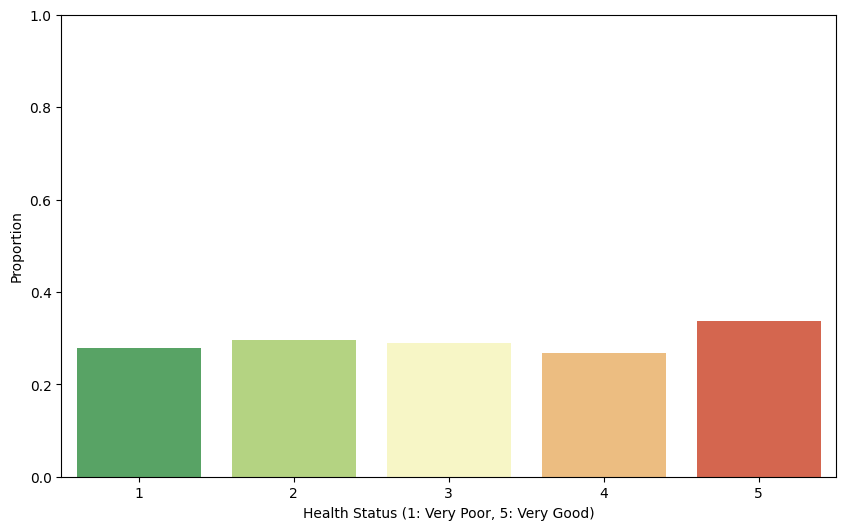

In [13]:
lower_model_df['actual_fail'] = lower_model_df['target'].apply(lambda x: 1 if x == 'fail' else 0)
health_agg = lower_model_df.groupby('health')['actual_fail'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='health', y='actual_fail', data=health_agg, palette='RdYlGn_r')
plt.xlabel('Health Status (1: Very Poor, 5: Very Good)')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()

This graph disproves the hypothesis as the median failure risk actually increases as students reach the highest health level

Median Risk:
- Students with level 2 health (fairly poor) show that the lowest median risk at ~15%
- Students with Level 5 health (very good) have the highest median risk at ~25%

Visual Spread:
- Students with level 5 health is positioned higher than students with level 1. This indicates that the middle ~50% (Level 5 Students) face higher range of failure risk than the least healthy group.

Outliers:
- All health levels except level 5 have several outliers, representing specific students with a ~100% failure risk regardless of their health status.

### 8. Students With a Higher Commute Time Perform Worse Than Those With Lower Communte Time (Partial Proven)

C:\Users\Arman\AppData\Local\Temp\ipykernel_24268\1619547780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traveltime', y='actual_fail', data=commute_agg, palette='magma')


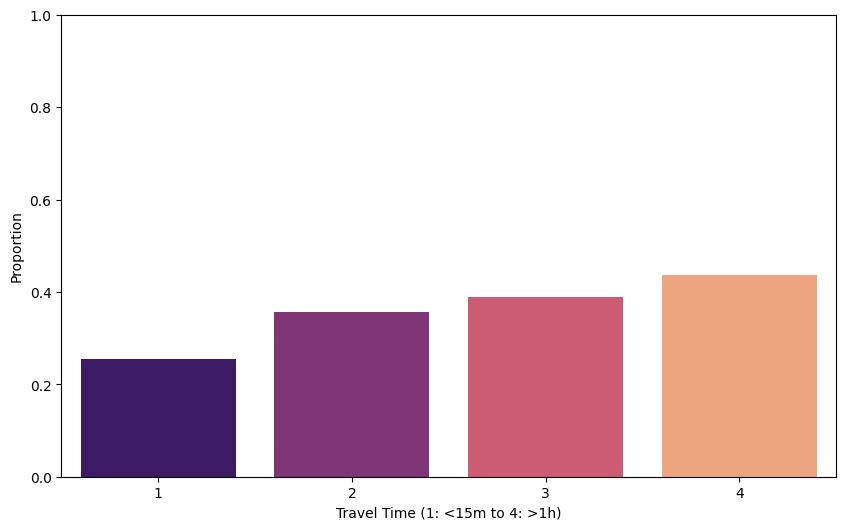

In [14]:
commute_agg = lower_model_df.groupby('traveltime')['actual_fail'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='traveltime', y='actual_fail', data=commute_agg, palette='magma')
plt.xlabel('Travel Time (1: <15m to 4: >1h)')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()

This graph partially approves

- First three categories supports hypothesis: As travel time increases from less than 15 minutes to 30m-1h, the average failure risk climbs from ~25% to over ~45%.
- The forth category contradicts as the avereage failure risk actually drops to ~35%

Important to Note:
- Category four has a large error bars, suggesting there are far fewer students in this group, making the data less reliable.